In [1]:
import os
figure_dir = "fig/typology"
os.makedirs("fig", exist_ok=True)
os.makedirs(figure_dir, exist_ok=True)

selecting the number of clusters

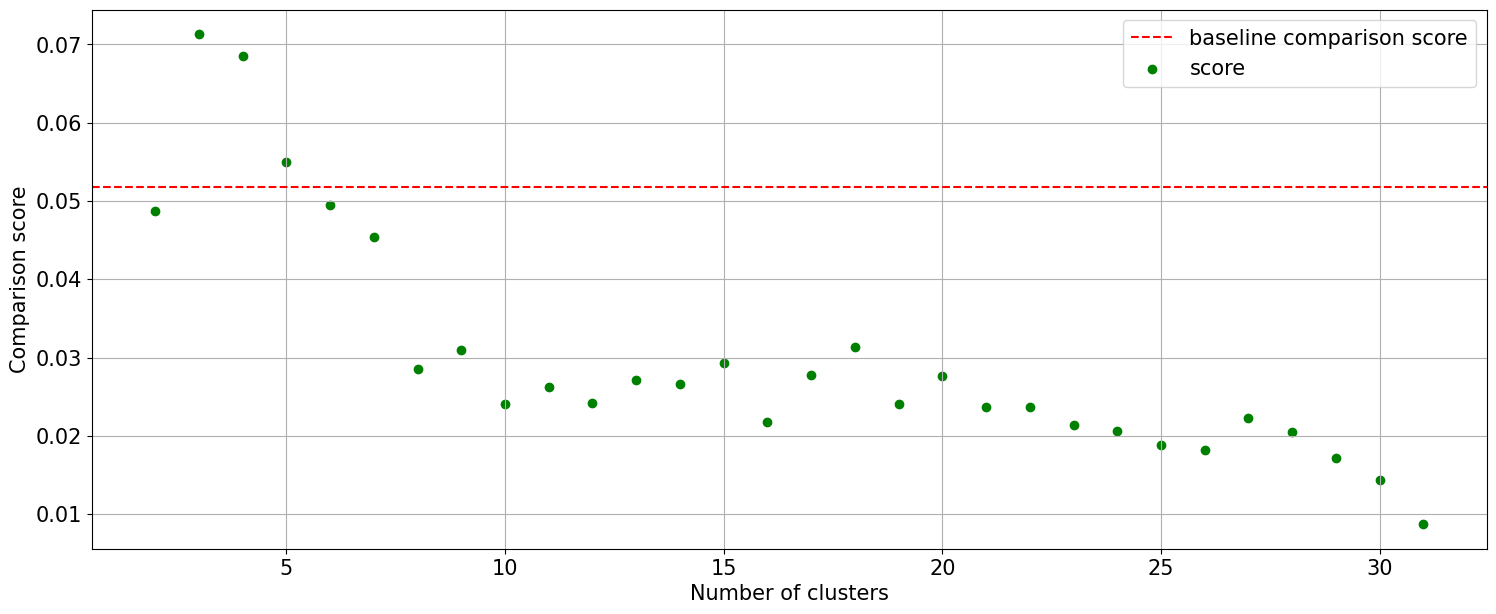

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

matplotlib.rcParams.update({'font.size': 15})
figure(figsize=(18,7), dpi=100)
results = pd.read_csv("../dataframes/language_clustering_results_baseline_num_of_clusters.csv", sep="\t")
plot = plt.scatter(data=results[0:30], x="min", y="score", c='green')
plt.axhline(y=0.0518, c='red', linestyle='dashed', label="baseline comparison score")
plt.grid()
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Comparison score")
#plot.axhline(0.0518, color='r', ls='--',label='p=0.05')
plt.savefig(f"{figure_dir}/baseline_number_of_clusters.png")

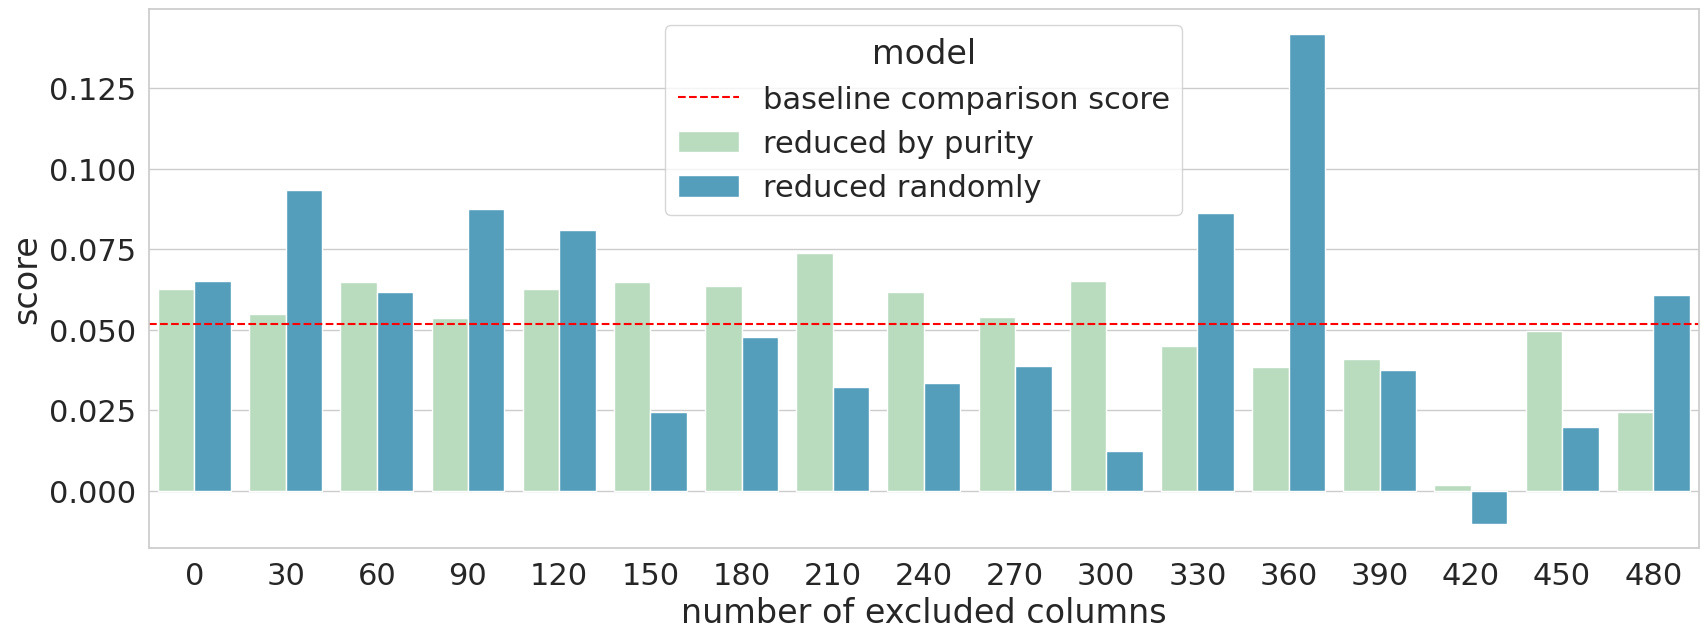

In [6]:
results = pd.read_csv("../dataframes/baseline_reduced_columns.csv", sep="\t")
results = results[::3]
results['model'] = results['model'].apply(lambda x: 'reduced by purity')

results2 = pd.read_csv("../dataframes/baseline_randomly_reduced_columns.csv", sep="\t")
results2 = results2[::3]
results2['model'] =results2['model'].apply(lambda x: 'reduced randomly')

merged = pd.concat([results, results2], axis=0, ignore_index=False)
merged['number of excluded columns'] = merged['reduced']
sns.set_theme(style="whitegrid", font_scale=2)
figure(figsize=(20,7), dpi=100)
plt.axhline(y=0.0518, c='red', linestyle='dashed', label="baseline comparison score")
ax = sns.barplot(x="number of excluded columns", y="score", palette='GnBu', hue='model', data=merged)
plt.savefig(f"{figure_dir}/baseline_dim_red_vs_rnd.png")
#merged

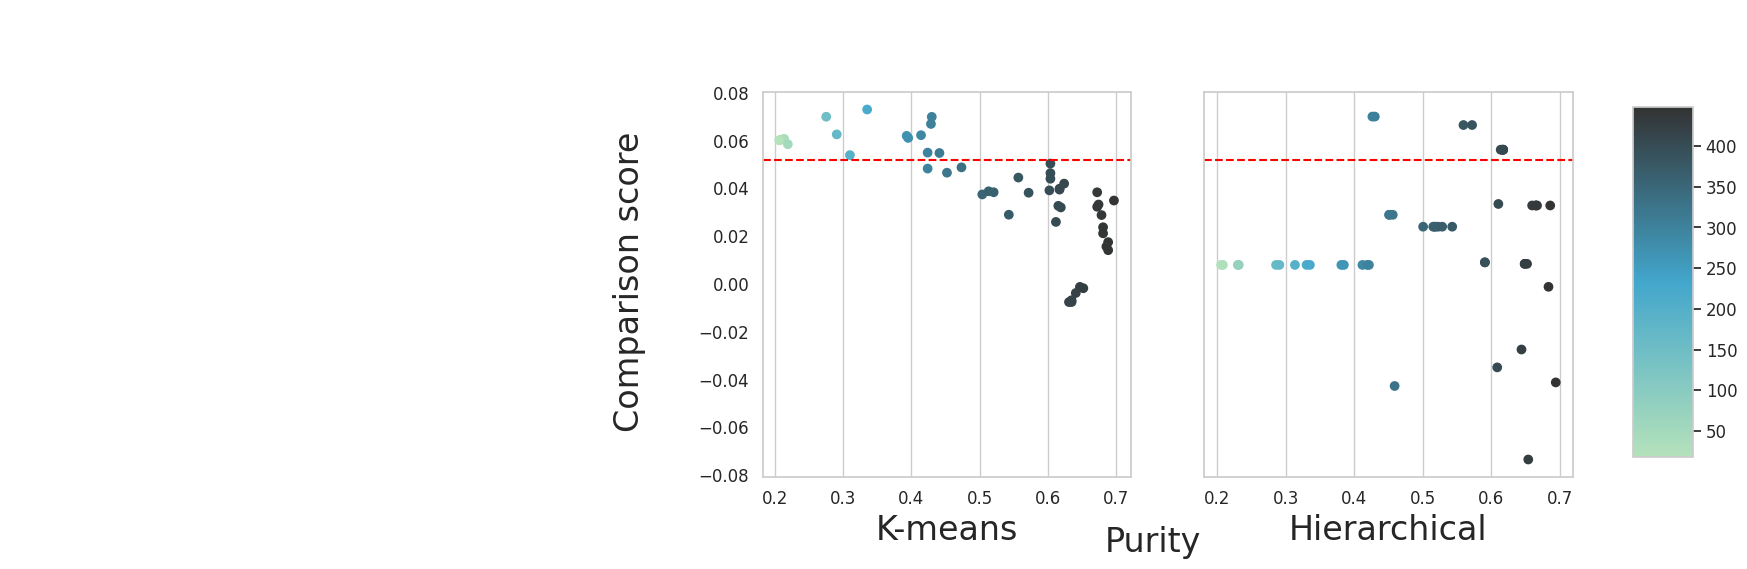

In [7]:
import matplotlib as mpl
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


hierh = pd.read_csv("../dataframes/hierh_purity_examiner.csv", sep="\t")
baseline = pd.read_csv("../dataframes/baseline_purity_examiner.csv", sep="\t")
cm = sns.color_palette("GnBu_d", as_cmap=True)#plt.cm.get_cmap('GnBu_d')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
f.text(0.45, -0.04, 'Purity', ha='center')
f.text(0.0, 0.5, 'Comparison score', va='center', rotation='vertical')
im = ax1.scatter(data=baseline, x="purity", y="score", c="reduced", cmap=cm)
ax1.grid(axis="y")
ax2.scatter(data=hierh, x="purity", y="score", c="reduced", cmap=cm)
ax2.grid(axis="y")

ax2.axhline(y=0.0518, c='red', linestyle='dashed', label="baseline comparison score")
ax1.axhline(y=0.0518, c='red', linestyle='dashed', label="baseline comparison score")

ax1.set(xlabel='K-means')
ax2.set(xlabel='Hierarchical')
plt.annotate("Baseline ", xy=(-0.55, 0.80), xycoords=ax.transAxes, size=13, color="red")

f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)
f.savefig('comp_purity_cmp.png', dpi=900)

In [8]:
score = hierh.iloc[hierh.score.idxmax()].score
score
hierh[hierh.score == score]

,model,reduced,purity,score
4,knn_cut,300,0.426282,0.070002
24,knn_cut,303,0.429792,0.070002


In [9]:
excluded = ["('B$_2$', 'animacy_verb')", "('B$_2$', 'definite_verb')", "('B$_2$', 'derivation_adj')", "('B$_2$', 'derivation_noun')", "('B$_2$', 'hebbinyan_verb')", "('B$_2$', 'infform_verb')", "('B$_2$', 'nametype_propn')", "('B$_2$', 'number[psor]_noun')", "('B$_2$', 'number_propn')", "('B$_2$', 'partform_verb')", "('B$_2$', 'person[psor]_noun')", "('B$_2$', 'polarity_adj')", "('B$_2$', 'subcat_verb')", "('B$_2$', 'subgender_adj')", "('B$_2$', 'tense_adj')", "('L$_2$', 'animacy_verb')", "('L$_2$', 'definite_verb')", "('L$_2$', 'derivation_adj')", "('L$_2$', 'derivation_noun')", "('L$_2$', 'hebbinyan_verb')", "('L$_2$', 'infform_verb')", "('L$_2$', 'nametype_propn')", "('L$_2$', 'number[psor]_noun')", "('L$_2$', 'number_propn')", "('L$_2$', 'partform_verb')", "('L$_2$', 'person[psor]_noun')", "('L$_2$', 'polarity_adj')", "('L$_2$', 'subcat_verb')", "('L$_2$', 'subgender_adj')", "('L$_2$', 'tense_adj')", "('R$_2$', 'animacy_verb')", "('R$_2$', 'definite_verb')", "('R$_2$', 'derivation_adj')", "('R$_2$', 'derivation_noun')", "('R$_2$', 'hebbinyan_verb')", "('R$_2$', 'infform_verb')", "('R$_2$', 'nametype_propn')", "('R$_2$', 'number[psor]_noun')", "('R$_2$', 'number_propn')", "('R$_2$', 'partform_verb')", "('R$_2$', 'person[psor]_noun')", "('R$_2$', 'polarity_adj')", "('R$_2$', 'subcat_verb')", "('R$_2$', 'subgender_adj')", "('R$_2$', 'tense_adj')", "('TARG', 'animacy_verb')", "('TARG', 'definite_verb')", "('TARG', 'derivation_adj')", "('TARG', 'derivation_noun')", "('TARG', 'hebbinyan_verb')", "('TARG', 'infform_verb')", "('TARG', 'nametype_propn')", "('TARG', 'number[psor]_noun')", "('TARG', 'number_propn')", "('TARG', 'partform_verb')", "('TARG', 'person[psor]_noun')", "('TARG', 'polarity_adj')", "('TARG', 'subcat_verb')", "('TARG', 'subgender_adj')", "('TARG', 'tense_adj')", "('mBERT-char', 'animacy_verb')", "('mBERT-char', 'definite_verb')", "('mBERT-char', 'derivation_adj')", "('mBERT-char', 'derivation_noun')", "('mBERT-char', 'hebbinyan_verb')", "('mBERT-char', 'infform_verb')", "('mBERT-char', 'nametype_propn')", "('mBERT-char', 'number[psor]_noun')", "('mBERT-char', 'number_propn')", "('mBERT-char', 'partform_verb')", "('mBERT-char', 'person[psor]_noun')", "('mBERT-char', 'polarity_adj')", "('mBERT-char', 'subcat_verb')", "('mBERT-char', 'subgender_adj')", "('mBERT-char', 'tense_adj')", "('mBERT-emb', 'animacy_verb')", "('mBERT-emb', 'definite_verb')", "('mBERT-emb', 'derivation_adj')", "('mBERT-emb', 'derivation_noun')", "('mBERT-emb', 'hebbinyan_verb')", "('mBERT-emb', 'infform_verb')", "('mBERT-emb', 'nametype_propn')", "('mBERT-emb', 'number[psor]_noun')", "('mBERT-emb', 'number_propn')", "('mBERT-emb', 'partform_verb')", "('mBERT-emb', 'person[psor]_noun')", "('mBERT-emb', 'polarity_adj')", "('mBERT-emb', 'subcat_verb')", "('mBERT-emb', 'subgender_adj')", "('mBERT-emb', 'tense_adj')", "('mBERT-nocontext', 'animacy_verb')", "('mBERT-nocontext', 'definite_verb')", "('mBERT-nocontext', 'derivation_adj')", "('mBERT-nocontext', 'derivation_noun')", "('mBERT-nocontext', 'hebbinyan_verb')", "('mBERT-nocontext', 'infform_verb')", "('mBERT-nocontext', 'nametype_propn')", "('mBERT-nocontext', 'number[psor]_noun')", "('mBERT-nocontext', 'number_propn')", "('mBERT-nocontext', 'partform_verb')", "('mBERT-nocontext', 'person[psor]_noun')", "('mBERT-nocontext', 'polarity_adj')", "('mBERT-nocontext', 'subcat_verb')", "('mBERT-nocontext', 'subgender_adj')", "('mBERT-nocontext', 'tense_adj')", "('mBERT-rand-char', 'animacy_verb')", "('mBERT-rand-char', 'definite_verb')", "('mBERT-rand-char', 'derivation_adj')", "('mBERT-rand-char', 'derivation_noun')", "('mBERT-rand-char', 'hebbinyan_verb')", "('mBERT-rand-char', 'infform_verb')", "('mBERT-rand-char', 'nametype_propn')", "('mBERT-rand-char', 'number[psor]_noun')", "('mBERT-rand-char', 'number_propn')", "('mBERT-rand-char', 'partform_verb')", "('mBERT-rand-char', 'person[psor]_noun')", "('mBERT-rand-char', 'polarity_adj')", "('mBERT-rand-char', 'subcat_verb')", "('mBERT-rand-char', 'subgender_adj')", "('mBERT-rand-char', 'tense_adj')", "('mBERT-rand-subw', 'animacy_verb')", "('mBERT-rand-subw', 'definite_verb')", "('mBERT-rand-subw', 'derivation_adj')", "('mBERT-rand-subw', 'derivation_noun')", "('mBERT-rand-subw', 'hebbinyan_verb')", "('mBERT-rand-subw', 'infform_verb')", "('mBERT-rand-subw', 'nametype_propn')", "('mBERT-rand-subw', 'number[psor]_noun')", "('mBERT-rand-subw', 'number_propn')", "('mBERT-rand-subw', 'partform_verb')", "('mBERT-rand-subw', 'person[psor]_noun')", "('mBERT-rand-subw', 'polarity_adj')", "('mBERT-rand-subw', 'subcat_verb')", "('mBERT-rand-subw', 'subgender_adj')", "('mBERT-rand-subw', 'tense_adj')", "('next', 'animacy_verb')", "('next', 'definite_verb')", "('next', 'derivation_adj')", "('next', 'derivation_noun')", "('next', 'hebbinyan_verb')", "('next', 'infform_verb')", "('next', 'nametype_propn')", "('next', 'number[psor]_noun')", "('next', 'number_propn')", "('next', 'partform_verb')", "('next', 'person[psor]_noun')", "('next', 'polarity_adj')", "('next', 'subcat_verb')", "('next', 'subgender_adj')", "('next', 'tense_adj')", "('permute', 'animacy_verb')", "('permute', 'definite_verb')", "('permute', 'derivation_adj')", "('permute', 'derivation_noun')", "('permute', 'hebbinyan_verb')", "('permute', 'infform_verb')", "('permute', 'nametype_propn')", "('permute', 'number[psor]_noun')", "('permute', 'number_propn')", "('permute', 'partform_verb')", "('permute', 'person[psor]_noun')", "('permute', 'polarity_adj')", "('permute', 'subcat_verb')", "('permute', 'subgender_adj')", "('permute', 'tense_adj')", "('prev', 'animacy_verb')", "('prev', 'definite_verb')", "('prev', 'derivation_adj')", "('prev', 'derivation_noun')", "('prev', 'hebbinyan_verb')", "('prev', 'infform_verb')", "('prev', 'nametype_propn')", "('prev', 'number[psor]_noun')", "('prev', 'number_propn')", "('prev', 'partform_verb')", "('prev', 'person[psor]_noun')", "('prev', 'polarity_adj')", "('prev', 'subcat_verb')", "('prev', 'subgender_adj')", "('prev', 'tense_adj')", "('B$_2$', 'animacy_propn')", "('B$_2$', 'aspect_adj')", "('B$_2$', 'degree_adj')", "('L$_2$', 'animacy_propn')", "('L$_2$', 'aspect_adj')", "('L$_2$', 'degree_adj')", "('R$_2$', 'animacy_propn')", "('R$_2$', 'aspect_adj')", "('R$_2$', 'degree_adj')", "('TARG', 'animacy_propn')", "('TARG', 'aspect_adj')", "('TARG', 'degree_adj')", "('mBERT-char', 'animacy_propn')", "('mBERT-char', 'aspect_adj')", "('mBERT-char', 'degree_adj')", "('mBERT-emb', 'animacy_propn')", "('mBERT-emb', 'aspect_adj')", "('mBERT-emb', 'degree_adj')", "('mBERT-nocontext', 'animacy_propn')", "('mBERT-nocontext', 'aspect_adj')", "('mBERT-nocontext', 'degree_adj')", "('mBERT-rand-char', 'animacy_propn')", "('mBERT-rand-char', 'aspect_adj')", "('mBERT-rand-char', 'degree_adj')", "('mBERT-rand-subw', 'animacy_propn')", "('mBERT-rand-subw', 'aspect_adj')", "('mBERT-rand-subw', 'degree_adj')", "('next', 'animacy_propn')", "('next', 'aspect_adj')", "('next', 'degree_adj')", "('permute', 'animacy_propn')", "('permute', 'aspect_adj')", "('permute', 'degree_adj')", "('prev', 'animacy_propn')", "('prev', 'aspect_adj')", "('prev', 'degree_adj')", "('B$_2$', 'case_verb')", "('B$_2$', 'polarity_verb')", "('B$_2$', 'voice_adj')", "('L$_2$', 'case_verb')", "('L$_2$', 'polarity_verb')", "('L$_2$', 'voice_adj')", "('R$_2$', 'case_verb')", "('R$_2$', 'polarity_verb')", "('R$_2$', 'voice_adj')", "('TARG', 'case_verb')", "('TARG', 'polarity_verb')", "('TARG', 'voice_adj')", "('mBERT-char', 'case_verb')", "('mBERT-char', 'polarity_verb')", "('mBERT-char', 'voice_adj')", "('mBERT-emb', 'case_verb')", "('mBERT-emb', 'polarity_verb')", "('mBERT-emb', 'voice_adj')", "('mBERT-nocontext', 'case_verb')", "('mBERT-nocontext', 'polarity_verb')", "('mBERT-nocontext', 'voice_adj')", "('mBERT-rand-char', 'case_verb')", "('mBERT-rand-char', 'polarity_verb')", "('mBERT-rand-char', 'voice_adj')", "('mBERT-rand-subw', 'case_verb')", "('mBERT-rand-subw', 'polarity_verb')", "('mBERT-rand-subw', 'voice_adj')", "('next', 'case_verb')", "('next', 'polarity_verb')", "('next', 'voice_adj')", "('permute', 'case_verb')", "('permute', 'polarity_verb')", "('permute', 'voice_adj')", "('prev', 'case_verb')", "('prev', 'polarity_verb')", "('prev', 'voice_adj')", "('B$_2$', 'animacy_adj')", "('L$_2$', 'animacy_adj')", "('R$_2$', 'animacy_adj')", "('TARG', 'animacy_adj')", "('mBERT-char', 'animacy_adj')", "('mBERT-emb', 'animacy_adj')", "('mBERT-nocontext', 'animacy_adj')", "('mBERT-rand-char', 'animacy_adj')", "('mBERT-rand-subw', 'animacy_adj')", "('next', 'animacy_adj')", "('permute', 'animacy_adj')", "('prev', 'animacy_adj')", "('B$_2$', 'animacy_noun')", "('B$_2$', 'definite_adj')", "('L$_2$', 'animacy_noun')", "('L$_2$', 'definite_adj')", "('R$_2$', 'animacy_noun')", "('R$_2$', 'definite_adj')", "('TARG', 'animacy_noun')", "('TARG', 'definite_adj')", "('mBERT-char', 'animacy_noun')", "('mBERT-char', 'definite_adj')", "('mBERT-emb', 'animacy_noun')", "('mBERT-emb', 'definite_adj')", "('mBERT-nocontext', 'animacy_noun')", "('mBERT-nocontext', 'definite_adj')", "('mBERT-rand-char', 'animacy_noun')", "('mBERT-rand-char', 'definite_adj')", "('mBERT-rand-subw', 'animacy_noun')", "('mBERT-rand-subw', 'definite_adj')", "('next', 'animacy_noun')", "('next', 'definite_adj')", "('permute', 'animacy_noun')", "('permute', 'definite_adj')", "('prev', 'animacy_noun')", "('prev', 'definite_adj')", "('B$_2$', 'mood_verb')", "('L$_2$', 'mood_verb')", "('R$_2$', 'mood_verb')", "('TARG', 'mood_verb')", "('mBERT-char', 'mood_verb')", "('mBERT-emb', 'mood_verb')", "('mBERT-nocontext', 'mood_verb')", "('mBERT-rand-char', 'mood_verb')", "('mBERT-rand-subw', 'mood_verb')", "('next', 'mood_verb')", "('permute', 'mood_verb')", "('prev', 'mood_verb')", "('B$_2$', 'voice_verb')", "('L$_2$', 'voice_verb')", "('R$_2$', 'voice_verb')"]

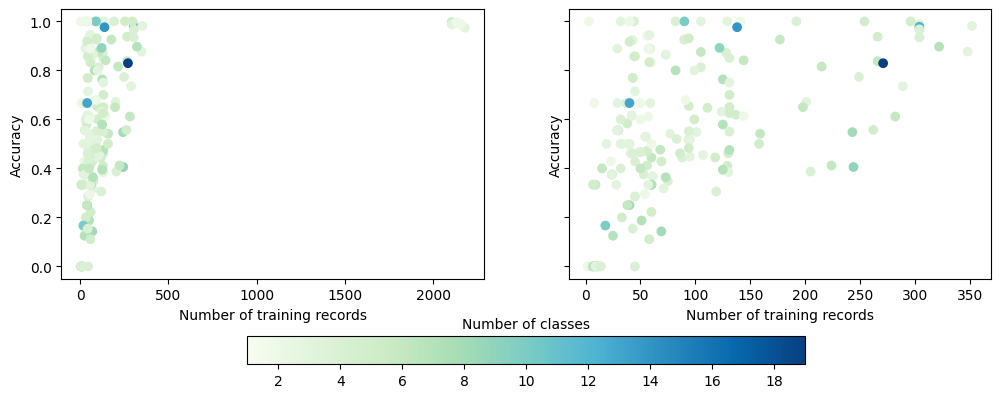

In [10]:
matplotlib.rc_file_defaults()
dtree = pd.read_csv('DTREE_results.csv')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
#cm = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
cm = plt.cm.get_cmap('GnBu')
d = ax1.scatter(data=dtree, x='Number of records', y='Accuracy', c="Classes", cmap=cm)
d2 = ax2.scatter(data=dtree[dtree['Number of records'] < 1500], x='Number of records', y='Accuracy', c="Classes", cmap=cm)

ax1.set_xlabel("Number of training records")
ax1.set_ylabel("Accuracy")

ax2.set_xlabel("Number of training records")
ax2.set_ylabel("Accuracy")

clb = f.colorbar(d, ax=[ax1, ax2], location='bottom', shrink=0.6)
clb.ax.set_title('Number of classes', fontsize = 10)
plt.savefig(f"{figure_dir}/dtree_results.png")

In [11]:
#dtree[dtree.Accuracy > (100/dtree.Classes)/100]
knn_opt[knn_opt.Accuracy > (100/knn_opt.Classes)/100]

NameError: name 'knn_opt' is not defined

0.6111111111111112

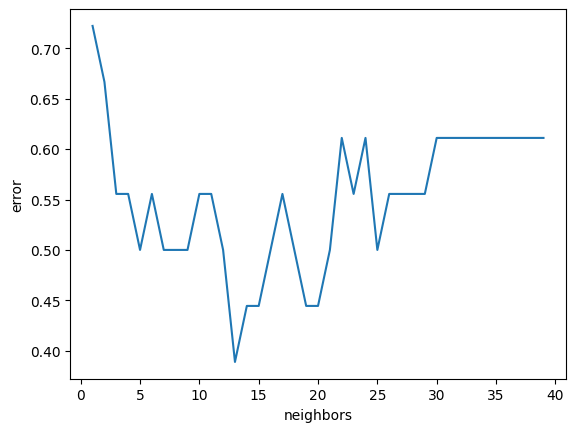

In [12]:
knn_all = pd.read_csv('KNN_means.csv')
sns.lineplot(data =knn_all, x='neighbors', y="error")
knn_all['mean'].max()

,Unnamed: 0,Feature,Number of records,Classes,Accuracy,Error rate,Neighbor
0,0,'Want' Complement Subjects,60,5,0.611111,0.388889,13.0
1,1,'When' Clauses,41,3,0.692308,0.307692,3.0
2,2,Absence of Common Consonants,131,4,0.925000,0.075000,1.0
3,3,Action Nominal Constructions,40,8,0.500000,0.500000,8.0
4,4,Adjectives without Nouns,30,4,0.888889,0.111111,3.0
...,...,...,...,...,...,...,...
183,183,Vowel Quality Inventories,130,3,0.615385,0.384615,2.0
184,184,Weight Factors in Weight-Sensitive Stress Systems,125,7,0.500000,0.500000,11.0
185,185,Weight-Sensitive Stress,125,7,0.473684,0.526316,15.0
186,186,Zero Copula for Predicate Nominals,2156,2,0.990726,0.009274,25.0


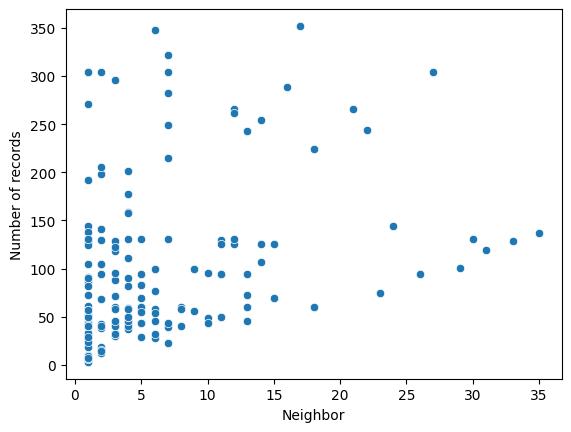

In [13]:
knn_opt = pd.read_csv('KNN_means_optimized.csv')
knn_opt
sns.scatterplot(data =knn_opt[knn_opt['Number of records'] < 1500], x='Neighbor', y='Number of records')
knn_opt

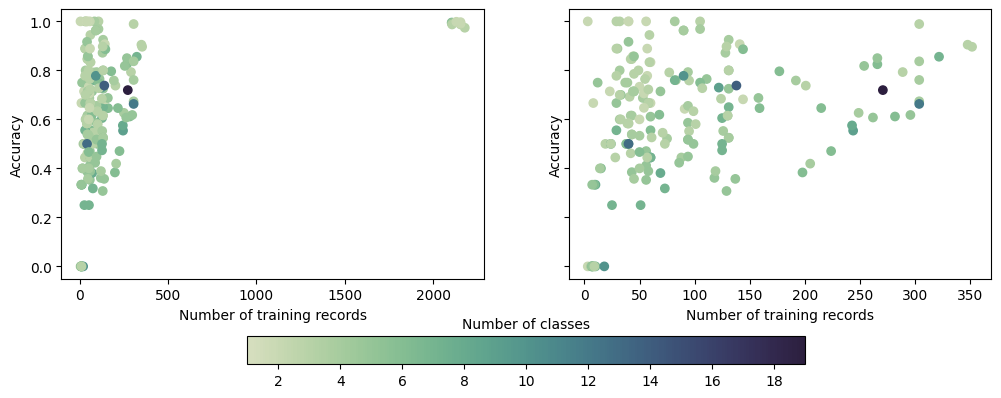

In [14]:
matplotlib.rc_file_defaults()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
cm = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
d = ax1.scatter(data=knn_opt, x='Number of records', y='Accuracy', c="Classes", cmap=cm)
d2 = ax2.scatter(data=knn_opt[knn_opt['Number of records'] < 1500], x='Number of records', y='Accuracy', c="Classes", cmap=cm)

ax1.set_xlabel("Number of training records")
ax1.set_ylabel("Accuracy")

ax2.set_xlabel("Number of training records")
ax2.set_ylabel("Accuracy")

clb = f.colorbar(d, ax=[ax1, ax2], location='bottom', shrink=0.6)
clb.ax.set_title('Number of classes', fontsize = 10)
plt.savefig(f"{figure_dir}/KNN_results.png")

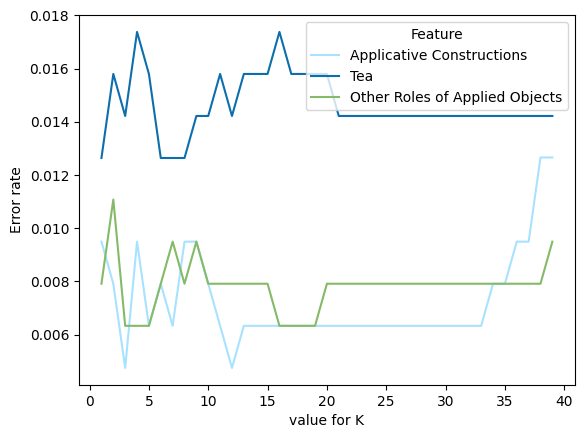

In [21]:
sns.set_palette(sns.color_palette("GnBu_d"))
example = pd.read_csv('example_oooav.csv')
example['Error rate'] = 1 - example['acc']
example['value for K'] = example['neighbor']
sns.lineplot(data=example, x='value for K', y='Error rate', hue='Feature', palette=['#a8e2ff','#0d6eae', '#84ba68'])
plt.savefig(f"{figure_dir}/KNN_example.png", dpi=500)

NameError: name 'interesting' is not defined

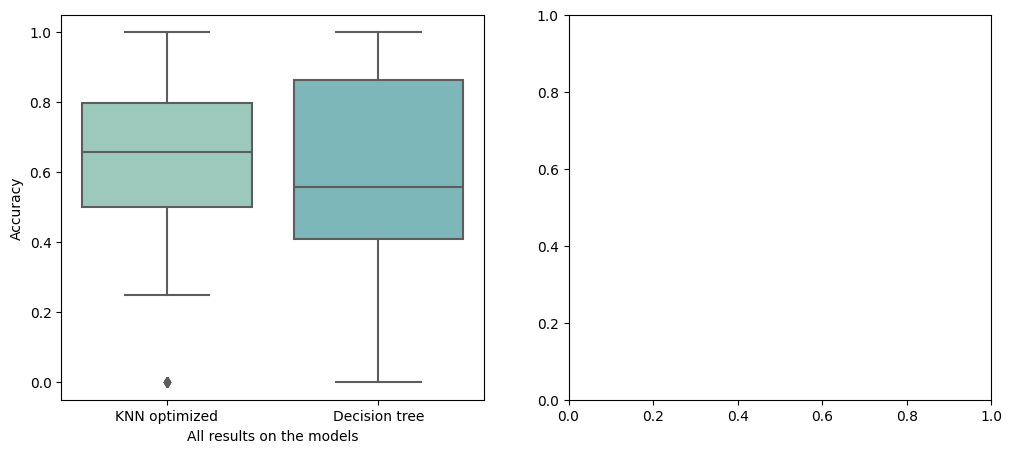

In [22]:
sns.set_palette(sns.color_palette("GnBu_d"))
results = pd.DataFrame(columns=['Model', 'Accuracy'])
opt_cut = knn_opt["Accuracy"].to_frame()
opt_cut["All results on the models"] = "KNN optimized"

dt_cut = dtree["Accuracy"].to_frame()
dt_cut["All results on the models"] = "Decision tree"
merged = pd.concat([opt_cut,dt_cut])
merged

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax = sns.boxplot(data=merged,x="All results on the models", y="Accuracy", ax=ax1)

f_opt_cut = knn_opt[knn_opt['Feature'].isin(interesting)]["Accuracy"].to_frame()
f_opt_cut["Results on model restricted to the features that are needed for further examination"] = "KNN optimized"

f_dt_cut = dtree[dtree['Feature'].isin(interesting)]["Accuracy"].to_frame()
f_dt_cut["Results on model restricted to the features that are needed for further examination"] = "Decision tree"
merged = pd.concat([f_opt_cut,f_dt_cut])

ax = sns.boxplot(data=merged,x="Results on model restricted to the features that are needed for further examination", y="Accuracy", ax=ax2)
plt.savefig(f"{figure_dir}/knn_dtree_comparison.png")

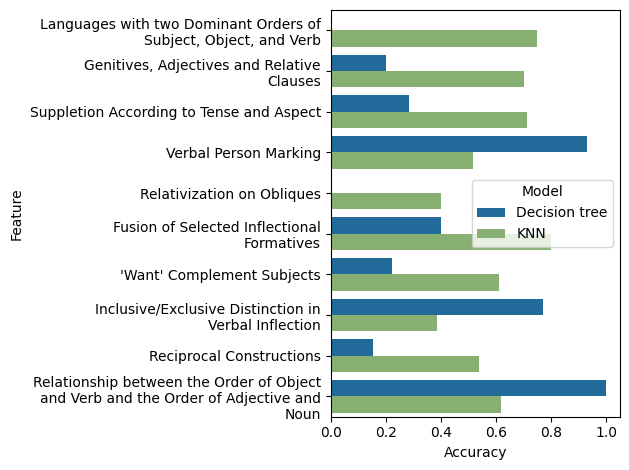

In [25]:
import textwrap
diff_cmp = pd.merge(knn_opt[['Accuracy', 'Feature']], dtree[['Accuracy', 'Feature']], on=['Feature'], suffixes=['_knn', '_dtree'])
diff_cmp['diff'] = abs(diff_cmp['Accuracy_knn']-diff_cmp['Accuracy_dtree'])
diff_cmp = diff_cmp.sort_values(by=['diff'], ascending=False)

to_vis = pd.DataFrame()
to_vis['Feature'] = diff_cmp[0:10]['Feature']
to_vis['Model'] = 'Decision tree'
to_vis['Accuracy'] = diff_cmp[0:10]['Accuracy_dtree']

to_vis2 = pd.DataFrame()
to_vis2['Feature'] = diff_cmp[0:10]['Feature']
to_vis2['Model'] = 'KNN'
to_vis2['Accuracy'] = diff_cmp[0:10]['Accuracy_knn']

to_vis = pd.concat([to_vis, to_vis2])
max_width = 40
sns.set_palette(sns.color_palette("GnBu_d"))
ax = sns.barplot(data=to_vis, y='Feature', x='Accuracy', hue='Model', palette=['#0d6eae', '#84ba68'])
ax.set_yticklabels((textwrap.fill(x.get_text(), max_width) for x in ax.get_yticklabels()), ha="right")
plt.tight_layout()
plt.savefig(f"{figure_dir}/knn_dtree_comparison_ex.png", dpi=500)

In [193]:
diff_cmp['acc_better'] = diff_cmp['Accuracy_knn']-diff_cmp['Accuracy_dtree']
len(diff_cmp[diff_cmp['acc_better'] == 0])

37